<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>

<h2>INCLUSIVE YEAR 2019 - 2022</h2>

<p>ANALYST: PETER PAUL F. ECLAVEA</p>

<h1>
    Data Preparations
</h1>

<h2> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

<h2> Getting the Data Frame

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident[accident['District Area'] == 'Kensington and Chelsea']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533088,201001TB00796,Slight,14/11/2022,51.489306,Darkness - lights lit,Kensington and Chelsea,-0.175749,2,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
533316,201001TE00005,Serious,17/01/2022,51.520998,Daylight,Kensington and Chelsea,-0.213258,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car
533327,201001TE00016,Serious,02/02/2022,51.497193,Daylight,Kensington and Chelsea,-0.168230,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car
533337,201001TE00029,Serious,12/03/2022,51.480287,Darkness - lights lit,Kensington and Chelsea,-0.185614,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc


In [5]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1> Data Cleansing

<h2> Checking if there are null values

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Filling the missing data using fillna</h1>

In [8]:
accident['Latitude'] = accident['Latitude'].fillna('unknown')

In [9]:
accident['Longitude'] = accident['Longitude'].fillna('unknown')

In [10]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown')

In [11]:
accident['Road_Type'] = accident['Road_Type'].fillna('unknown')

In [12]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna('unknown')

In [13]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unknown')

<h1>Changing data types into proper ones</h1>

In [14]:
accident['Latitude'] = accident['Latitude'].astype('category')

In [15]:
accident['Longitude'] = accident['Longitude'].astype('category')

In [16]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [17]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [18]:
accident['District Area'] = accident['District Area'].astype('category')

In [19]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')

In [20]:
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [21]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [22]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [23]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

<h1>Converting Date Field into DATE TIME data type</h1>

In [24]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
#remove spaces like 20 / 02 / 2025
accident['Accident Date'] = accident['Accident Date'].str.strip()
#replace / with -
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [25]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h1>Checking if there is still a null value</h1>

In [26]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Adding new data columns</h1>

In [27]:
accident ['Year'] = accident['Accident Date'].dt.year
accident ['Month'] = accident['Accident Date'].dt.month
accident ['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [28]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
DayOfWeek                  0
dtype: int64

In [29]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'DayOfWeek'],
      dtype='object')

<h1>QUESTION NO.1</h1>

<h2>Which year had the most accidents?</h2>

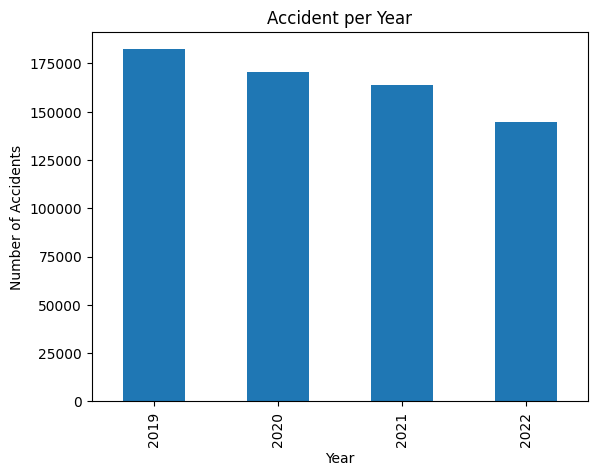

In [30]:
accident_year = accident['Year'].value_counts().sort_index()

accident_year.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()




<h1>INSIGHT NO.1</h1>

<h2>The year 2019 had the most accidents covering a 182115 or 27.56% of 660679 total amount of accidents within the year 2019-2022.</h2>

<h1>QUESTION NO.2</h1>

<h2>What was the worst month by having the most accidents in 2019?</h2>

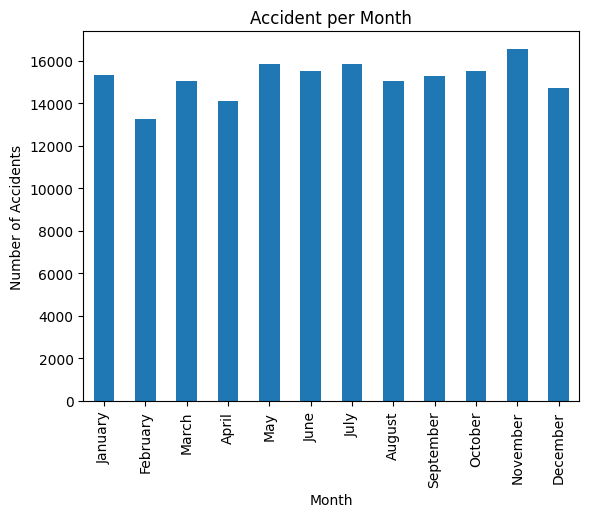

In [35]:
df_2019 = accident[accident['Year'] == 2019]
df_month = df_2019['Month'].value_counts().sort_index()

months = { 1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
         6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
         11:'November', 12:'December'
}
df_month.index = df_month.index = df_month.index.map(months)

df_month.plot(kind='bar')
plt.title('Accident per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()




<h1>INSIGHT NO.2</h1>

<h2>November had the highest number of accidents having a total number of 16559 or 9.09% of 182115.</h2>

<h1>QUESTION NO.3</h1>

<h2>What were the most common road surface conditions in November 2019</h2>

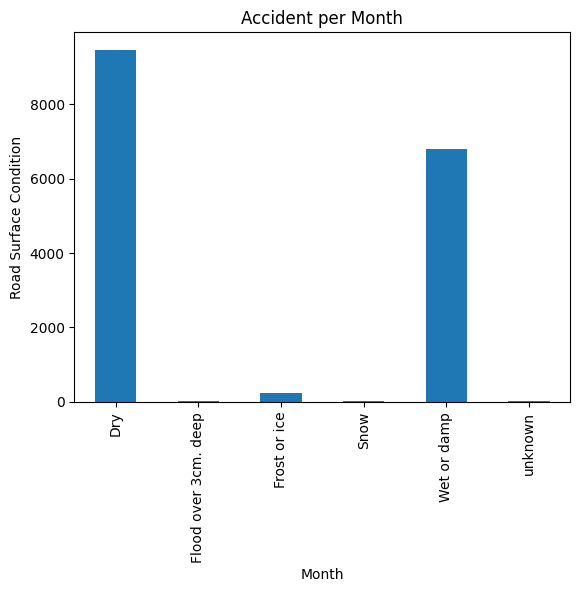

In [42]:
df_Nov2019 = df_2019[df_2019['Month'] == 11]
Road_Nov_2019 = df_Nov2019['Road_Surface_Conditions'].value_counts().sort_index()


Road_Nov_2019.plot(kind='bar')
plt.title('Accident per Month')
plt.xlabel('Month')
plt.ylabel('Road Surface Condition')
plt.show()


<h1>INSIGHT NO.3</h1>

<h2>There are a total of 9458 accidents occured in a dry surface road on November 2019</h2>

<h1>QUESTION NO.4</h1>

<h2>Which vehicle types were involved in accidents on a dry surface road on November 2019?</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

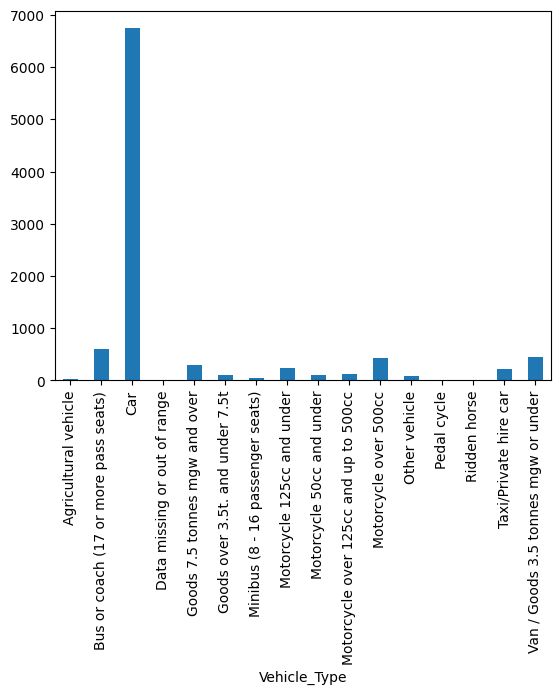

In [45]:
Vehicle2019 = df_Nov2019[df_Nov2019['Road_Surface_Conditions'] == 'Dry']['Vehicle_Type'].value_counts().sort_index()


Vehicle2019.plot(kind='bar')
bar.plot('Dry'
plt.show


<h1>INSIGHT NO.4</h1>

<h2>Cars were involved in most accidents probably due to it is the most common type of vehicle</h2>

<h1>QUESTION NO.5</h1>

<h2>Do more vehicles involved in an accident lead to more Casualties?</h2>

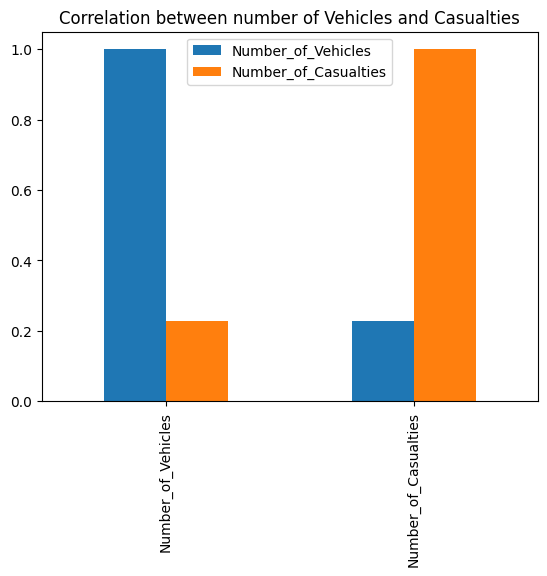

In [47]:
Vehicle_corr = accident[["Number_of_Vehicles", "Number_of_Casualties"]].corr()

Vehicle_corr.plot(kind='bar')
plt.title('Correlation between number of Vehicles and Casualties')
plt.show()

<h1>INSIGHT NO.5</h1>

<h2>More vehicles involved in an accident tend to result in more casualties.</h2>

<h1>QUESTION NO.6</h1>

<h2>What types of road have the most occuring fatal accidents</h2>

In [ ]:
Fatal_road = accident[accident["Accident_Severity"] == "Fatal"] ["Road_Type"].value_counts().sort_index()

Fatal_road.plot(kind='bar')
plt.xlabel
plt.ylabel

<h1>INSIGHT NO.6</h1>

<h2>A single carriageway type of road is the most prone to fatal accidents</h2>

<h1>QUESTION NO.7</h1>

<h2>What type of vehicle is most likely to have an accident in a single carriageway with a Fatal accident.</h2>

In [ ]:
accident[(accident["Road_Type"] == "Single carriageway") & 
           (accident["Accident_Severity"] == "Fatal")]["Vehicle_Type"].value_counts()


<h1>INSIGHT NO.7</h1>

<h2>A total of 4973 or 76.19% out of 6527 total Fatal accidents in a single carriageway involved cars</h2>

<h1>QUESTION NO.8</h1>

<h2>What month has the most occured accidents in 2021</h2>

In [ ]:
df_2021 = accident[accident ['Year'] == 2021]

In [ ]:
df_2021['Month'].sum()

In [ ]:
df_2021['Month'].value_counts()

<h1>INSIGHT NO.8</h1>

<h2>The most accident occured is the month of November which is almost 1.42% of the whole year of 2021</h2>

<h1>QUESTION NO.9</h1>

<h2>What kind of road surface condition is prone to accident in November 2021</h2>

In [ ]:
df_Nov2021 = df_2021[df_2021['Month'] == 11]

In [ ]:
df_Nov2021['Road_Surface_Conditions'].value_counts()

<h1>INSIGHT NO.9</h1>

<h2>9,323 accidents, or 60.25%, were caused by wet roads.</h2>

<h1>QUESTION NO.10</h1>

<h2>What type of Vehicle is commonly involved in a wet road surface with fatal accidents on November 2021 aside from cars</h2>

In [ ]:
df_Nov2021[(df_Nov2021["Road_Surface_Conditions"] == "Wet or damp") & 
           (df_Nov2021["Accident_Severity"] == "Fatal")]["Vehicle_Type"].value_counts()


<h1>INSIGHT NO.10</h1>

<h2>Motorcycles are the most commonly involved vehicles in fatal accidents on wet roads aside from cars, likely due to loss of control, skidding, and lack of protection.</h2>

<h1>QUESTION NO.11</h1>

<h2>Which vehicle type had the least number of accidents?</h2>

In [ ]:
least_accident_vehicle = accident["Vehicle_Type"].value_counts().idxmin()
least_accident_vehicle_count = accident["Vehicle_Type"].value_counts().min()
print(f"Least involved vehicle type: {least_accident_vehicle} with {least_accident_vehicle_count} accidents")

accident["Vehicle_Type"].value_counts()

<h1>INSIGHT NO.11</h1>

<h2>Riding Horse is the least number of accident recorded within 2019-2022 with only 4 recorded accidents</h2>

<h1>QUESTION NO.12</h1>

<h2>Where do Ridden Horse accidents occured? is it only in Rural areas or both?</h2>

In [ ]:
accident[accident["Vehicle_Type"] == least_accident_vehicle]["Urban_or_Rural_Area"].value_counts()


<h1>INSIGHT NO.12</h1>

<h2>3 of them are occured in an Urban area while the other 1 occured in a Rural Area.</h2>

<h1>QUESTION NO.13</h1>

<h2>What Day of the Week are these accidents commonly occurs?</h2>

In [ ]:
accident[accident["Vehicle_Type"] == least_accident_vehicle]["DayOfWeek"].value_counts()

<h1>INSIGHT NO.13</h1>

<h2>All accidents of the Ridden Horse occur in weekdays, 2 in Thursday and 1 in both Tuesday and Wednesday.</h2>

<h1>QUESTION for NO.14 - 15</h1>

<h2>How many accidents involved heavy vehicles each year?</h2>

In [ ]:
heavy_vehicles = ['Bus or coach (17 or more pass seats)', 'Goods 7.5 tonnes mgw and over', 
                'Goods over 3.5t. and under 7.5t', 'Van / Goods 3.5 tonnes mgw or under']

df_heavy = accident[accident['Vehicle_Type'].isin(heavy_vehicles)]
df_heavy['Year'].value_counts().sort_index()


<h1>INSIGHT NO.14 - 15</h1>

<h2>There are 28082 total of accidents that involved heavy vehicles on the year 2019.

<h2>The result shows that each year, the heavy vehicles involved in an accident becomes less as the year pass by.</h2>

<h1>QUESTION for NO.16</h1>

<h2>Which heavy vehicle type is most frequently involved in accidents?</h2>

In [ ]:
df_heavy['Vehicle_Type'].mode()[0]

In [ ]:
df_heavy['Vehicle_Type'].value_counts()

<h1>INSIGHT NO.16</h1>

<h2>Vans are the most frequently involved heavy vehicles in accidents, likely due to their high numbers on the road.</h2>


<h1>QUESTION NO.17</h1>

<h2>Do heavy vehicle accidents involve more vehicles and lead to more casualties?</h2>

In [ ]:
df_heavy[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

<h1>INSIGHT NO.17</h1>

<h2>It shows that having a heavy vehicle involved in an accident can cause more casualties</h2>

<h1>QUESTION NO.18</h1>
 <h2>Do wet roads increase heavy vehicle accident severity?

In [ ]:
df_heavy[df_heavy["Road_Surface_Conditions"] == "Wet or damp"]["Accident_Severity"].value_counts()


<h1>INSIGHT NO.18</h1>

<h2>Approximately 328 or 1.37% is recorded as Fatal, most of the accidents of heavy vehicle that occurs on wet roads are slight.</h2>

<h1>QUESTION for NO.19-20</h1>
 <h2>What District area is the most accidents that involves heavy vehicles? Both in Rural and Urban areas.

In [ ]:
accident.columns

In [ ]:
Rural_district = df_heavy[df_heavy['Urban_or_Rural_Area'] == 'Rural'] ["District Area"].mode()[0]
Urban_district = df_heavy[df_heavy['Urban_or_Rural_Area'] == 'Urban'] ["District Area"].mode()[0]

total_rural_accidents = accident[accident["District Area"] == Rural_district].shape[0]
total_urban_accidents = accident[accident["District Area"] == Urban_district].shape[0]

print(f"Total Accidents in {Rural_district} (Rural): {total_rural_accidents}")
print(f"Total Accidents in {Urban_district} (Urban): {total_urban_accidents}")



<h1>INSIGHT NO.19-20</h1>

<h2>In rural areas, Aberdeenshire has the most case involving Heavy vehicles amounting to a total of 1930</h2>

<h2>While in urban area, Birmingham has the most case of accidents amounting to a total of 13491.